In [2]:
import func
# 1000개의 42초
raw = func.load_recipe_tiny(5000)
data = func.recipe_preprocessing_tiny(raw)
recipe = func.split_ingredient_tiny(data)
matrix = func.recipe_food_matrix(recipe)
matrix.head(5)

100%|██████████| 4816/4816 [00:07<00:00, 670.77it/s]


,recipe_title,콘중간짜리,녹차가루,고춧가루(선택),다진깨,광어스테이크용,강낭콩,미니단호박,청정원멸치국물내기티백,양상추원하는만큼,...,푸실리,초코파이,따뜻한밥,총각김치,요거트,홍고추(파프리카대신사용),발사믹식초또는드레싱,가쓰오장국,맛술또는생강술,팽이
0,호박 새우젓찌개 만드는 방법~★,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,바글바글 전복 된장찌개,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,순두부찌개....오도독 씹히는 미더덕이 들어간 순두부찌개!!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,정통 바지락 순두부 찌개,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,크림토마토 비프 스튜,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1]:
import func
def two_matrix(n):
    raw = func.load_recipe(n)
    data = func.recipe_preprocessing(raw)
    data2 = func.split_ingredient(data)
    ingred_matrix = func.recipe_food_matrix(data2)
    print("ingred matrix completed")

    nutri = func.select_table('select * from nutrient_table')
    nutri_matrix = func.recipe_nutri_tiny(data2, nutri)
    print("nutrition matrix completed")
    return ingred_matrix, nutri_matrix

In [2]:
raw = func.load_recipe(100)
data = func.recipe_preprocessing(raw)
data2 = func.split_ingredient(data)
im, nm = two_matrix(100)

100%|██████████| 96/96 [00:00<00:00, 2498.52it/s]


ingred matrix completed
nutrition matrix completed


### 정규화

In [4]:
im.sum(axis=1)

C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_19408\2081216683.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  im.sum(axis=1)


0      501.500000
1      185.833333
2      242.500000
3      314.000000
4     1391.333333
         ...     
91     110.000000
92     269.000000
93     252.000000
94     100.000000
95     465.000000
Length: 96, dtype: float64

In [28]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

TruncatedSVD()

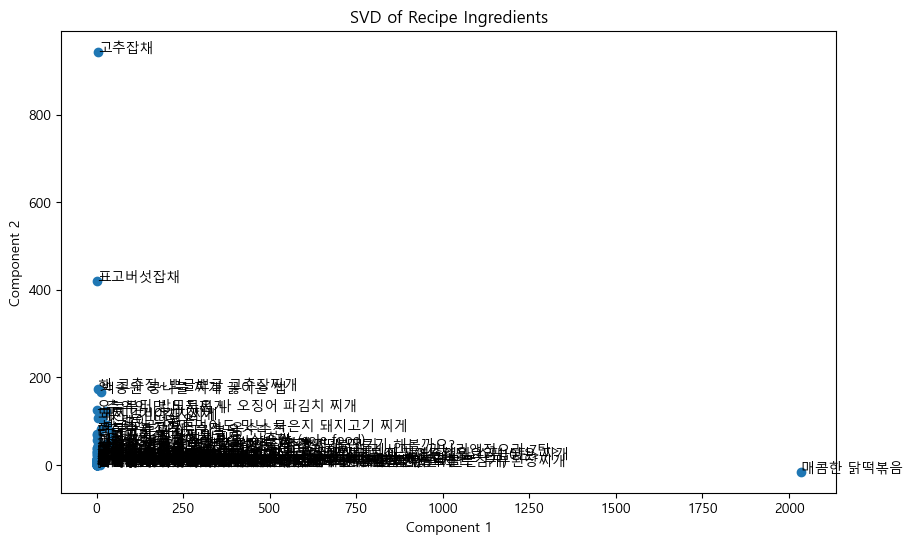

In [30]:
ingredients = im.drop('recipe_title', axis=1)
svd = TruncatedSVD(n_components=2)  # 2차원으로 축소
ingredients_reduced = svd.fit_transform(ingredients)
plt.figure(figsize=(10, 6))
plt.scatter(ingredients_reduced[:, 0], ingredients_reduced[:, 1])
for i, txt in enumerate(im.recipe_title):
    plt.annotate(txt, (ingredients_reduced[i, 0], ingredients_reduced[i, 1]))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('SVD of Recipe Ingredients')
plt.show()

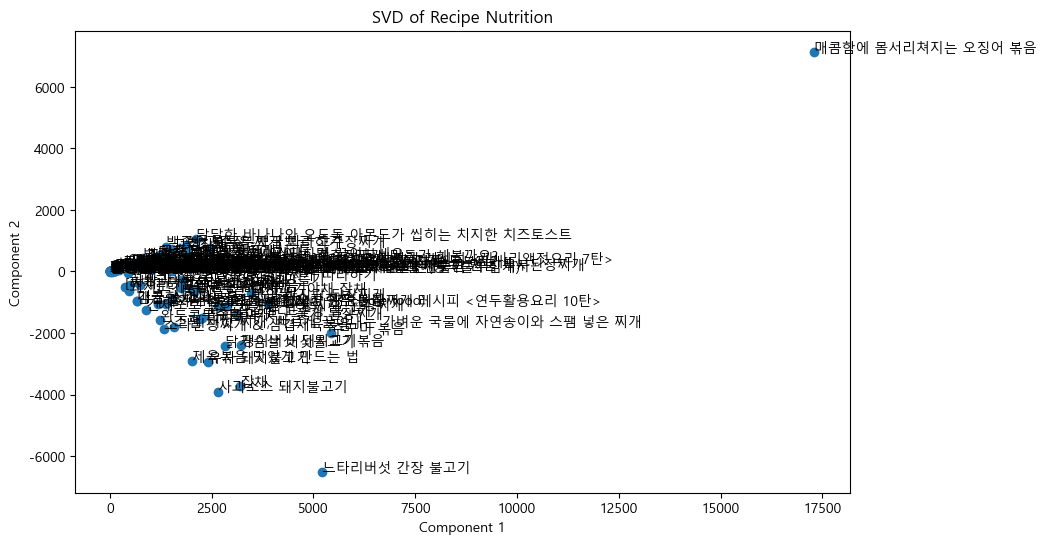

In [32]:
ingredients = nm.drop('recipe_title', axis=1)
svd = TruncatedSVD(n_components=2)  # 2차원으로 축소
ingredients_reduced = svd.fit_transform(ingredients)
plt.figure(figsize=(10, 6))
plt.scatter(ingredients_reduced[:, 0], ingredients_reduced[:, 1])
for i, txt in enumerate(im.recipe_title):
    plt.annotate(txt, (ingredients_reduced[i, 0], ingredients_reduced[i, 1]))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('SVD of Recipe Nutrition')
plt.show()

In [71]:
ingred_matrix = func.recipe_food_matrix(data2)

100%|██████████| 96/96 [00:00<00:00, 2239.01it/s]


In [ ]:
ingred_matrix

In [70]:
nutri = func.select_table('select * from nutrient_table')
nutri_matrix = func.recipe_nutri(data2, nutri)
nutri_matrix.shape

c:\Users\HwijunKwon\github\recipe\models\func.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_recipe1[f'quantity{i}'] = pd.to_numeric(new_recipe1[f'quantity{i}'], errors='coerce').astype('float16')
c:\Users\HwijunKwon\github\recipe\models\func.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_recipe1[f'multi{i}'] = None
c:\Users\HwijunKwon\github\recipe\models\func.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

(96, 26)

In [47]:
import pandas as pd
merged_matrix_outer = pd.merge(ingred_matrix, nutri_matrix, on= 'recipe_title', how = 'outer')
merged_matrix_inner = pd.merge(ingred_matrix, nutri_matrix, on= 'recipe_title', how = 'inner')

In [52]:
nutri_matrix[nutri_matrix['recipe_title'] == '냉이 된장찌개']

,recipe_title,총합_에너지(kcal),총합_수분(g),총합_단백질(g),총합_지방(g),총합_회분(g),총합_탄수화물(g),총합_당류(g),총합_식이섬유(g),총합_칼슘(mg),...,총합_베타카로틴(μg),총합_티아민(mg),총합_리보플라빈(mg),총합_니아신(mg),총합_비타민c(mg),총합_비타민d(μg),총합_콜레스테롤(mg),총합_포화지방산(g),총합_트랜스지방산(g),총합_폐기율(%)
20,냉이 된장찌개,9.8,16.84,1.018,0.100,0.204,1.838,0.000,1.62,38.4,...,331.0,0.000,0.064,0.080,7.16,0.00,0.00,0.020,0.000,0.0
326,냉이 된장찌개,91.6,101.66,9.170,2.567,5.241,11.368,0.123,9.54,226.2,...,1657.1,0.132,0.377,0.604,35.80,0.00,0.00,0.403,0.006,0.0
545,냉이 된장찌개,106.5,77.20,13.265,4.175,0.965,4.595,0.000,4.05,98.0,...,827.5,0.025,0.200,2.215,18.45,0.29,25.75,1.620,0.090,0.0


In [46]:
ingred_matrix['recipe_title'][ingred_matrix['recipe_title'].duplicated()].value_counts()

냉이 된장찌개        2
청국장찌개          2
방울토마토 마리네이드    1
오꼬노미야끼         1
돼지고기 김치찌개      1
간편하게 끓인 문어죽    1
고등어 조림         1
통감자버터구이        1
Name: recipe_title, dtype: int64

In [56]:
len(set(nutri_matrix['recipe_title']))

923

In [55]:
ingred_matrix.shape

(933, 1746)

In [48]:
ingred_matrix.shape, nutri_matrix.shape

((933, 1746), (933, 26))

In [49]:
merged_matrix_outer.shape, merged_matrix_inner.shape

((957, 1771), (957, 1771))

In [33]:
merged_matrix.isna().sum().sum()

0

In [21]:
merged_matrix.tail(3)

,recipe_title,날치알,시금치,대파파란부분,공기밥,얼음많이,생쌀,묵은파김치있으면넣으세요,다진파조금,수삼,...,총합_베타카로틴(μg),총합_티아민(mg),총합_리보플라빈(mg),총합_니아신(mg),총합_비타민c(mg),총합_비타민d(μg),총합_콜레스테롤(mg),총합_포화지방산(g),총합_트랜스지방산(g),총합_폐기율(%)
954,토마토 아이스바,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1144.0,0.02,0.467,0.775,35.0,0.0,0.0,0.043,0.00,0.0
955,< 간식> 감자칩 / 전자렌지,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.0,0.36,0.156,0.330,0.0,0.0,0.0,0.060,0.00,0.0
956,노오븐! 간단한 크렘브륄레 만들기 [NO BAKE] Creme brulee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.06,0.486,0.900,2.4,0.0,29.1,6.510,0.42,0.0


In [ ]:
nutri_matrix.loc[:, 'recipe_title'][10]

In [ ]:
nutri_matrix

In [ ]:
nutri_matrix[nutri_matrix.iloc[:, 1:].sum(axis = 1) == 0.0]

In [ ]:
ingred_matrix[ingred_matrix.iloc[:, 1:].sum(axis = 1) == 0.0]

In [ ]:
nutri_matrix.isna().sum().sum()

In [ ]:
data1.loc[1, 'recipe_title']

In [ ]:
data2 = func.load_recipe_tiny(n = 100)

In [ ]:
import pandas
data1.equals(data2)

In [ ]:
def load_recipe(n=1000):
    od.init_oracle_client(lib_dir=r"C:\Program Files\Oracle\instantclient_21_12") # DB 연결
    conn = od.connect(user=config.DB_CONFIG['user'], password=config.DB_CONFIG['password'], dsn=config.DB_CONFIG['dsn'])
    exe = conn.cursor()
    exe.execute(f'SELECT * FROM (SELECT * FROM recipe_table ORDER BY row_cnt ASC) WHERE row_cnt <= {n}')
    result = pd.DataFrame(exe.fetchall(), columns=[col[0].lower() for col in exe.description])  # row와 column 이름을 가져와 DataFrame 생성
    conn.close()
    return result

In [ ]:
load_recipe(100)

In [ ]:
a = 1, b = 2
print((a, b))

In [ ]:
func.not_matching(n=10000)

In [ ]:
func.not_matching(n=10000)

In [ ]:
raw = load_recipe(100000)
b = recipe_preprocessing(raw)
c = split_ingredient(b)

In [ ]:
from func import recipe_food_matrix
recipe_food_matrix(c)

In [ ]:
import pandas as pd
all_ingredients = set()
for i in range(1, 21):  
    all_ingredients.update(data[f'ingredient{i}'].dropna().unique())

recipe_ingredients_df = pd.DataFrame(columns=list(all_ingredients))

In [ ]:
def convert_fraction_to_float(quantity):
    from fractions import Fraction
    try:
        return float(Fraction(quantity))
    except ValueError:
        return None 
def convert_unit_to_number(unit):
    '''
    단위에 따른 g 수 변환
    '''
    unit_conversion = {
        'g': 1,
        '개': 100,
        '조금' :10
    }
    return unit_conversion.get(unit, 1)

In [ ]:
data.shape

In [ ]:
recipe_rows = []
for idx, row in data.iterrows():
    recipe_data = {ingredient: 0.0 for ingredient in all_ingredients}  # 모든 식재료를 None으로 초기화
    for i in range(1, 21):  
        ingredient = row[f'ingredient{i}']
        quantity = row[f'quantity{i}']
        unit = row[f'unit{i}']
        if pd.notna(ingredient) and pd.notna(quantity):
            quantity_float = convert_fraction_to_float(quantity) # 양이 분수일 경우 숫자로 변환 
            if quantity_float is not None:
                unit_number = convert_unit_to_number(unit) if pd.notna(unit) else 1
                recipe_data[ingredient] = quantity_float * unit_number
                recipe_data['recipe_title'] = row['recipe_title']
    recipe_rows.append(recipe_data)


In [ ]:
['a', 'b', 'c'].append('d')

In [ ]:
recipe_rows[2]['recipe_title']

In [ ]:
recipe_rows[0]

In [ ]:
recipe_ingredients_df = pd.concat([pd.DataFrame([row]) for row in recipe_rows], ignore_index=True)
recipe_ingredients_df = recipe_ingredients_df.astype('float64')

In [ ]:
df = pd.DataFrame(data['recipe_title'], columns=['recipe_title'])
df

In [ ]:
list(all_ingredients)

In [ ]:
df.columns.extend(list(all_ingredients))
df.shape

In [ ]:
import numpy as np

In [ ]:
df[list(all_ingredients)] = np.nan

In [ ]:
import oracledb as od
import pandas as pd
import numpy as np
import config
from tqdm import tqdm
import ast
import re
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from scipy.linalg import svd
def recipe_food_matrix(data):
    def convert_fraction_to_float(quantity):
        from fractions import Fraction
        try:
            return float(Fraction(quantity))
        except ValueError:
            return None 
    def convert_unit_to_number(unit):
        '''
        단위에 따른 g 수 변환
        '''
        unit_conversion = {
            'g': 1,
            '개': 100,
            '조금' :10
        }
        return unit_conversion.get(unit, 1)
    all_ingredients = set()
    for i in range(1, 21):  
        all_ingredients.update(data[f'ingredient{i}'].dropna().unique())

    recipe_ingredients_df = pd.DataFrame(columns=list(all_ingredients))

    recipe_rows = []
    for idx, row in data.iterrows():
        recipe_data = {ingredient: 0.0 for ingredient in all_ingredients}  # 모든 식재료를 None으로 초기화
        for i in range(1, 21):  
            ingredient = row[f'ingredient{i}']
            quantity = row[f'quantity{i}']
            unit = row[f'unit{i}']
            if pd.notna(ingredient) and pd.notna(quantity):
                quantity_float = convert_fraction_to_float(quantity)
                if quantity_float is not None:
                    unit_number = convert_unit_to_number(unit) if pd.notna(unit) else 1
                    recipe_data[ingredient] = quantity_float * unit_number
        recipe_rows.append(recipe_data)

    # 새로운 데이터프레임 생성 (모든 식재료를 열로 가짐)
    recipe_ingredients_df = pd.concat([pd.DataFrame([row]) for row in recipe_rows], ignore_index=True)
    recipe_ingredients_df = recipe_ingredients_df.astype('float64')
    recipe_ingredients_df['recipe_title'] = data['recipe_title']
    
    return recipe_ingredients_df

In [ ]:
data = recipe_food_matrix(recipe)

In [ ]:
recipe['recipe_title'].isna().sum(), recipe_food_matrix(recipe)['recipe_title'].isna().sum()

In [ ]:
import func
import numpy as np
def load_matrix(n=100): 
    raw = func.load_recipe(n)
    recipe = func.recipe_preprocessing(raw)
    data = func.split_ingredient(recipe)
    matrix = func.recipe_food_matrix(data)
    return matrix

matrix = load_matrix(100)
a, b, c= func.nutri_svd(method ='scipy', df = matrix, n =10)
ab = a.dot(np.diag(b))
bc = 
matrix_small = func.nutri_svd(method = 'sklearn', df = matrix, n =10)

In [ ]:
matrix_small.shape

In [ ]:
np.linalg.norm(b, axis=0)

In [ ]:
b = b / np.linalg.norm(b, axis=0)

In [ ]:
np.dot(a, np.diag(b)).dot(c).shape

In [ ]:
import numpy as np
import pandas as pd
ex = np.array(
    [[1, 0, 0, 1],
     [2, 1, 0, 1],
     [0, 2, 1, 0]]
)

U, S, V = func.nutri_svd(method = 'scipy', df = pd.DataFrame(ex), n =2)
result = U[:, :2].dot(np.diag(S[:2])) # 2개 만사용
result2 = result.dot(result.T)/(np.linalg.norm(result, axis =1)*np.linalg.norm(result.T, axis = 0))

In [ ]:
result.dot(result.T) #

In [ ]:
np.linalg.norm(result, axis =1), np.linalg.norm(result.T, axis = 0)

In [ ]:
ex = np.array(
    [[1, 0, 0, 1],
     [2, 1, 0, 1],
     [0, 2, 1, 0]]
)
from scipy.linalg import svd
a, b, c= svd(ex)
ab = np.dot(a, np.diag(b)) # 3x3
bc = 

In [ ]:
a= nutri_svd(matrix, 10 )

In [ ]:
result = nutri_svd(matrix, 10 )
recipe_cos(matrix, result, 1 )

In [ ]:
def nutri_svd(df, n): # df = 입력할 테이블, n = 차원수


    nutrients_df = df.drop(columns=['recipe_title'])
    matrix = nutrients_df.to_numpy()

    svd = TruncatedSVD(n_components=n)
    result = svd.fit_transform(matrix)
    return result

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
def nutri_svd(df, n): # df = 입력할 테이블, n = 차원수
    nutrients_df = df.copy()
    matrix = nutrients_df.to_numpy()

    svd = TruncatedSVD(n_components=n)
    result = svd.fit_trans

In [ ]:
nutri_svd(matrix, 10)

In [ ]:
target = '후추'
matrix_2 = matrix.loc[matrix[:, 1] != target]


In [ ]:
matrix.head(3)

In [ ]:
input = matrix.iloc[:,:-1].to_numpy()
import numpy as np
from scipy.linalg import svd

In [ ]:
a, b, c= svd(input)
ab = a[:, :100].dot(np.diag(b[:100])) # 레시피에 식재료가 얼마나 중요한지지
bc = c.T[:, :100].dot(np.diag(b[:100]))

In [ ]:
input = matrix.iloc[:,:-1].to_numpy()

from scipy.linalg import svd
len(svd(input)) # 3

a, b, c= svd(input)
ab = a[:, :100].dot(np.diag(b[:100])) # 레시피에 식재료가 얼마나 중요한지지
bc = c.T[:, :100].dot(np.diag(b[:100])) # 식재료에 레시피가 얼마나 중요한지 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
ab.shape, bc.shape

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(ab[:, 0])
plt.scatter(bc[:, 0], bc[:, 1])

In [ ]:
ab[0] - bc[0]

In [ ]:
result = a[:, :100].dot(np.diag(b[:100]))

In [ ]:
result2 = result.dot(result.T)/(np.linalg.norm(result, axis =1)*np.linalg.norm(result.T, axis = 0))

In [ ]:
result2[1].argsort()


In [ ]:
matrix.iloc[46]

In [ ]:
ab = a[:, :100].dot(np.diag(b[:100]))
bc = c.T[:, :100].dot(np.diag(b[:100]))

In [ ]:
matrix.iloc[8]